In [37]:
import pandas as pd
from pandas import json_normalize

In [38]:
import spotipy
from spotipy.oauth2 import SpotifyClientCredentials

from tqdm import tqdm
import time 


In [39]:
import matplotlib.pyplot as plt

from sklearn import cluster, datasets
from sklearn.preprocessing import StandardScaler
from matplotlib.lines import Line2D

In [40]:
tracks = pd.read_pickle("temp_data/raw_model_tracks.pkl")
tracks.head(2).T

,0,1
track.id,31nfdEooLEq7dn3UMcIeB5,0gMTEHzNIyvxikxyUFFJxO
track.name,Vois sur ton chemin - Techno Mix,Summertime
track.external_urls.spotify,https://open.spotify.com/track/31nfdEooLEq7dn3...,https://open.spotify.com/track/0gMTEHzNIyvxikx...
artist_dict,{0: {'external_urls': {'spotify': 'https://ope...,{0: {'external_urls': {'spotify': 'https://ope...
track.album.id,79Cyc8GRWnLyjdJSMyJ0dB,3d5e4tp3t5zTGu44NM88LQ
track.album.name,Vois sur ton chemin (Techno Mix),Summertime
track.album.images,"[{'height': 640, 'url': 'https://i.scdn.co/ima...","[{'height': 640, 'url': 'https://i.scdn.co/ima..."
track.album.release_date,2023-08-04,2023-08-10
track.popularity,85.0,81.0
danceability,0.634,0.756


['duration_ms', 'danceability',
                                           'energy', 'key', 'loudness', 'mode', 'speechiness', 'acousticness',
                                           'instrumentalness', 'liveness', 'valence', 'tempo', 'time_signature']]

In [41]:
tracks.columns

Index(['track.id', 'track.name', 'track.external_urls.spotify', 'artist_dict',
       'track.album.id', 'track.album.name', 'track.album.images',
       'track.album.release_date', 'track.popularity', 'danceability',
       'energy', 'key', 'loudness', 'mode', 'speechiness', 'acousticness',
       'instrumentalness', 'liveness', 'valence', 'tempo', 'type_x', 'id_x',
       'uri_x', 'track_href', 'analysis_url', 'duration_ms', 'time_signature',
       'artists_dfs', 'external_urls', 'href', 'id_y', 'name', 'type_y',
       'uri_y', 'song_id', 'artist_id', 'artist_images', 'artist_name',
       'artist_popularity', 'artist_link', 'artist_follower'],
      dtype='object')

In [42]:
X_tracks = tracks[['duration_ms', 'danceability','energy', 'key', 'loudness', 'mode', 'speechiness', 'acousticness','instrumentalness', 'liveness', 'valence', 'tempo', 'time_signature']]

In [43]:
X_tracks

,duration_ms,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,time_signature
0,178156.0,0.634,0.824,2.0,-3.394,0.0,0.0470,0.0908,0.071100,0.1190,0.371,137.959,4.0
1,195466.0,0.756,0.647,6.0,-5.488,0.0,0.1590,0.2790,0.000005,0.1020,0.464,134.995,4.0
2,142840.0,0.807,0.532,5.0,-8.484,0.0,0.2750,0.6330,0.000002,0.1260,0.478,130.016,4.0
3,145013.0,0.719,0.628,8.0,-6.269,0.0,0.2110,0.0733,0.000002,0.1190,0.472,139.957,4.0
4,163539.0,0.809,0.660,2.0,-4.727,0.0,0.3390,0.1890,0.000000,0.1090,0.332,87.886,4.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
60982,163533.0,0.633,0.759,0.0,-11.833,1.0,0.0368,0.1220,0.424000,0.1320,0.926,110.034,4.0
60983,177133.0,0.830,0.759,0.0,-11.880,1.0,0.0315,0.2140,0.876000,0.1150,0.955,125.009,4.0
60984,153453.0,0.811,0.603,7.0,-12.997,1.0,0.0649,0.5420,0.925000,0.0911,0.725,110.014,4.0
60985,134200.0,0.819,0.222,9.0,-15.183,0.0,0.0397,0.3490,0.112000,0.1080,0.791,137.286,4.0


In [44]:
import pickle 

from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
scaler.fit(X_tracks)

pickle.dump(scaler, open('model_data/standardScaler.p', 'wb'))

X_tracks_prep = scaler.transform(X_tracks)
display(X_tracks_prep)

array([[-0.37376778,  0.3741786 ,  1.03592027, ..., -0.18340842,
         0.68117523,  0.25481122],
       [-0.20008307,  0.96515283,  0.45006522, ...,  0.16333189,
         0.58571714,  0.25481122],
       [-0.7281207 ,  1.21219944,  0.06942493, ...,  0.21552936,
         0.4253643 ,  0.25481122],
       ...,
       [-0.6216322 ,  1.23157564,  0.30442893, ...,  1.13644179,
        -0.21881675,  0.25481122],
       [-0.81481254,  1.27032805, -0.95664889, ...,  1.38251556,
         0.6595007 ,  0.25481122],
       [-0.22028107,  0.99421714, -0.20860798, ...,  2.04244066,
        -0.70212967,  0.25481122]])

In [45]:
X_tracks_scaled = pd.DataFrame(X_tracks_prep, columns=scaler.get_feature_names_out(X_tracks.columns))


In [46]:
X_tracks_scaled

,duration_ms,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,time_signature
0,-0.373768,0.374179,1.035920,-0.897289,0.992669,-1.263096,-0.403495,-0.884849,-0.592998,-0.372286,-0.183408,0.681175,0.254811
1,-0.200083,0.965153,0.450065,0.225527,0.749808,-1.263096,0.624884,-0.391207,-0.770075,-0.491309,0.163332,0.585717,0.254811
2,-0.728121,1.212199,0.069425,-0.055177,0.402333,-1.263096,1.689991,0.537321,-0.770082,-0.323276,0.215529,0.425364,0.254811
3,-0.706317,0.785923,0.387177,0.786935,0.659228,-1.263096,1.102346,-0.930751,-0.770080,-0.372286,0.193159,0.745522,0.254811
4,-0.520432,1.221888,0.493094,-0.897289,0.838069,-1.263096,2.277636,-0.627274,-0.770086,-0.442300,-0.328816,-0.931467,0.254811
...,...,...,...,...,...,...,...,...,...,...,...,...,...
60982,-0.520492,0.369335,0.820776,-1.458698,0.013917,0.791705,-0.497151,-0.803013,0.285970,-0.281268,1.885848,-0.218173,0.254811
60983,-0.384032,1.323613,0.820776,-1.458698,0.008466,0.791705,-0.545815,-0.561700,1.411765,-0.400291,1.993972,0.264110,0.254811
60984,-0.621632,1.231576,0.304429,0.506231,-0.121083,0.791705,-0.239138,0.298632,1.533809,-0.567624,1.136442,-0.218817,0.254811
60985,-0.814813,1.270328,-0.956649,1.067640,-0.374615,-1.263096,-0.470523,-0.207600,-0.491128,-0.449301,1.382516,0.659501,0.254811


In [47]:
# original_model = pickle.load(open('filename.p', 'rb'))

  0%|                                                                                           | 0/18 [00:00<?, ?it/s]C:\Users\Domen\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
  6%|████▌                                                                              | 1/18 [00:00<00:07,  2.14it/s]C:\Users\Domen\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
 11%|█████████▏                                                                         | 2/18 [00:01<00:08,  1.79it/s]C:\Users\Domen\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value

Text(0.5, 1.0, 'Elbow Method showing the optimal k')

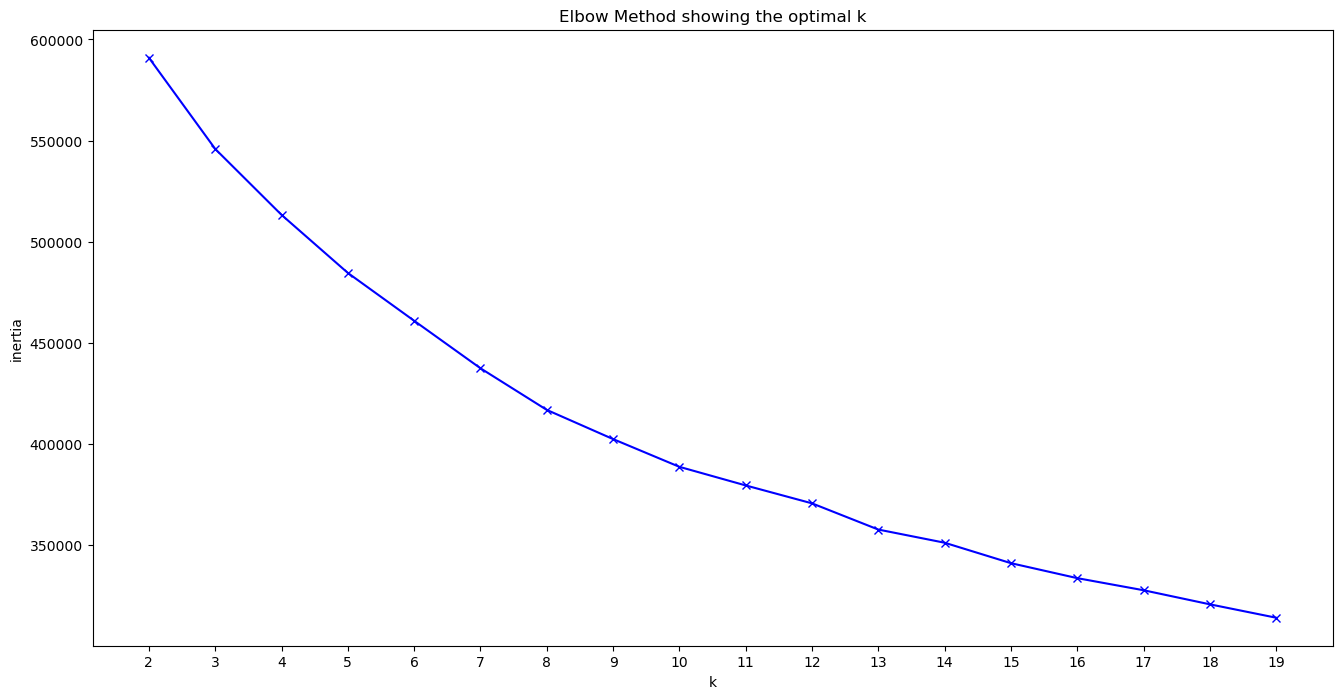

In [48]:
# choosing K fpr k means

from sklearn.cluster import KMeans

import numpy as np
K = range(2, 20)
inertia = []

for k in tqdm(K):
    kmeans = KMeans(n_clusters=k,
                    random_state=1234)
    kmeans.fit(X_tracks_scaled)
    inertia.append(kmeans.inertia_)

import matplotlib.pyplot as plt
%matplotlib inline


plt.figure(figsize=(16,8))
plt.plot(K, inertia, 'bx-')
plt.xlabel('k')
plt.ylabel('inertia')
plt.xticks(np.arange(min(K), max(K)+1, 1.0))
plt.title('Elbow Method showing the optimal k')

  0%|                                                                                           | 0/13 [00:00<?, ?it/s]C:\Users\Domen\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
  8%|██████▍                                                                            | 1/13 [00:43<08:37, 43.10s/it]C:\Users\Domen\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
 15%|████████████▊                                                                      | 2/13 [01:23<07:37, 41.62s/it]C:\Users\Domen\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value

Text(0.5, 1.0, 'Slhouette score showing the optimal k')

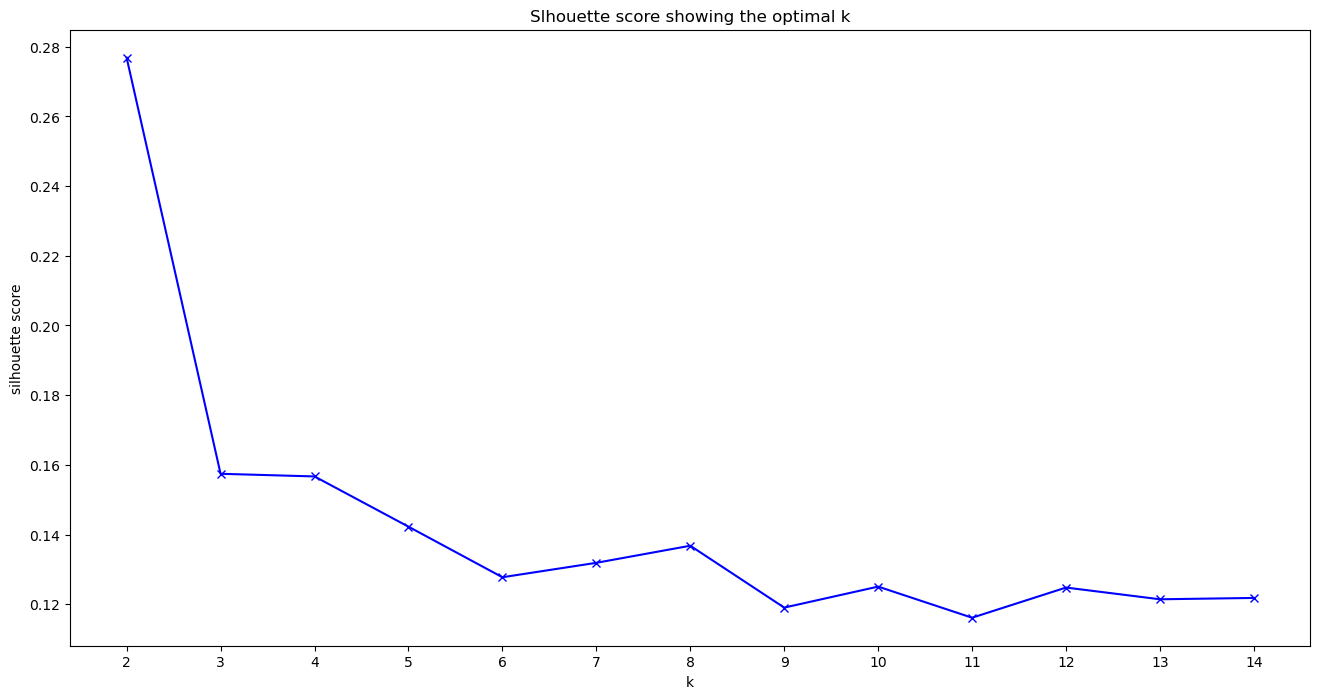

In [49]:
from sklearn.metrics import silhouette_score
K = range(2, 15)
silhouette = []

for k in tqdm(K):
    kmeans = KMeans(n_clusters=k,
                    random_state=1234)
    kmeans.fit(X_tracks_scaled)
    silhouette.append(silhouette_score(X_tracks_scaled, kmeans.predict(X_tracks_scaled)))


plt.figure(figsize=(16,8))
plt.plot(K, silhouette, 'bx-')
plt.xlabel('k')
plt.ylabel('silhouette score')
plt.xticks(np.arange(min(K), max(K)+1, 1.0))
plt.title('Slhouette score showing the optimal k')

In [63]:
from sklearn.cluster import KMeans 

kmeans = KMeans(n_clusters=8)
kmeans.fit(X_tracks_scaled)

pickle.dump(kmeans, open('model_data/kmean_Model.p', 'wb'))

C:\Users\Domen\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


In [64]:
X_tracks_scaled

,duration_ms,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,time_signature
0,-0.373768,0.374179,1.035920,-0.897289,0.992669,-1.263096,-0.403495,-0.884849,-0.592998,-0.372286,-0.183408,0.681175,0.254811
1,-0.200083,0.965153,0.450065,0.225527,0.749808,-1.263096,0.624884,-0.391207,-0.770075,-0.491309,0.163332,0.585717,0.254811
2,-0.728121,1.212199,0.069425,-0.055177,0.402333,-1.263096,1.689991,0.537321,-0.770082,-0.323276,0.215529,0.425364,0.254811
3,-0.706317,0.785923,0.387177,0.786935,0.659228,-1.263096,1.102346,-0.930751,-0.770080,-0.372286,0.193159,0.745522,0.254811
4,-0.520432,1.221888,0.493094,-0.897289,0.838069,-1.263096,2.277636,-0.627274,-0.770086,-0.442300,-0.328816,-0.931467,0.254811
...,...,...,...,...,...,...,...,...,...,...,...,...,...
60982,-0.520492,0.369335,0.820776,-1.458698,0.013917,0.791705,-0.497151,-0.803013,0.285970,-0.281268,1.885848,-0.218173,0.254811
60983,-0.384032,1.323613,0.820776,-1.458698,0.008466,0.791705,-0.545815,-0.561700,1.411765,-0.400291,1.993972,0.264110,0.254811
60984,-0.621632,1.231576,0.304429,0.506231,-0.121083,0.791705,-0.239138,0.298632,1.533809,-0.567624,1.136442,-0.218817,0.254811
60985,-0.814813,1.270328,-0.956649,1.067640,-0.374615,-1.263096,-0.470523,-0.207600,-0.491128,-0.449301,1.382516,0.659501,0.254811


In [65]:
# Predicting / assigning the clusters:
clusters = kmeans.predict(X_tracks_scaled)

# Check the size of the clusters
pd.Series(clusters).value_counts().sort_index()

0     4035
1    13722
2     1183
3     9208
4     8631
5    16757
6     3008
7     4443
dtype: int64

In [66]:
tracks.columns

Index(['track.id', 'track.name', 'track.external_urls.spotify', 'artist_dict',
       'track.album.id', 'track.album.name', 'track.album.images',
       'track.album.release_date', 'track.popularity', 'danceability',
       'energy', 'key', 'loudness', 'mode', 'speechiness', 'acousticness',
       'instrumentalness', 'liveness', 'valence', 'tempo', 'type_x', 'id_x',
       'uri_x', 'track_href', 'analysis_url', 'duration_ms', 'time_signature',
       'artists_dfs', 'external_urls', 'href', 'id_y', 'name', 'type_y',
       'uri_y', 'song_id', 'artist_id', 'artist_images', 'artist_name',
       'artist_popularity', 'artist_link', 'artist_follower'],
      dtype='object')

In [69]:
final_df = tracks[['track.id', 'track.name', 'artist_name', 'track.external_urls.spotify', 'artist_dict','track.album.id', 'track.album.name', 'track.album.images','track.album.release_date']]
final_df['cluster'] = clusters

C:\Users\Domen\AppData\Local\Temp\ipykernel_30884\4136136083.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  final_df['cluster'] = clusters


In [70]:
final_df.to_csv('temp_data/clustered_songs.csv')

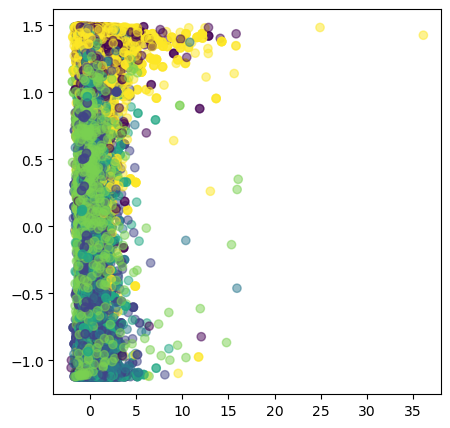

In [56]:
plt.figure(figsize=(5, 5))
plt.scatter(X_tracks_prep[:, 0], X_tracks_prep[:, 7], c=clusters,alpha=0.5)
plt.show()

In [57]:
from sklearn.decomposition import PCA

pca = PCA()
pca.fit(X_tracks_scaled)

PCA()

In [58]:
X_tracks_pca = pca.transform(X_tracks_scaled)
X_tracks_pca

array([[-1.66449107,  0.11441776,  0.1342482 , ..., -0.20504476,
        -0.09471535,  0.10515901],
       [-1.64165642, -0.6682153 ,  0.81357886, ..., -0.42647599,
        -0.00465465,  0.08798539],
       [-1.20220824, -1.23443188,  0.44788485, ..., -0.58690327,
        -0.28944879,  0.32746703],
       ...,
       [-0.1002674 , -1.56087235, -0.32020262, ...,  0.07505713,
        -0.43440789,  0.30991079],
       [-0.81587348, -1.82947829,  1.17963655, ..., -0.05196563,
         1.05172534, -0.35011087],
       [-0.88275601, -1.90140103,  1.83260713, ...,  1.12884323,
         0.47485268, -0.60984609]])

In [59]:
# import seaborn as sns
# df = pd.DataFrame()
# df["y"] = clusters
# df["comp_pca-1"] = X_tracks_pca[:,0]
# df["comp-pca-2"] = X_tracks_pca[:,1]


# plt.figure(figsize=(15 , 10))
# sns.scatterplot(x="comp-1", y="comp-2", hue=df.y.tolist(),
#                 palette=sns.color_palette("Paired", 5),
#                 data=df).set(title="Song Cluster plot using pca") 

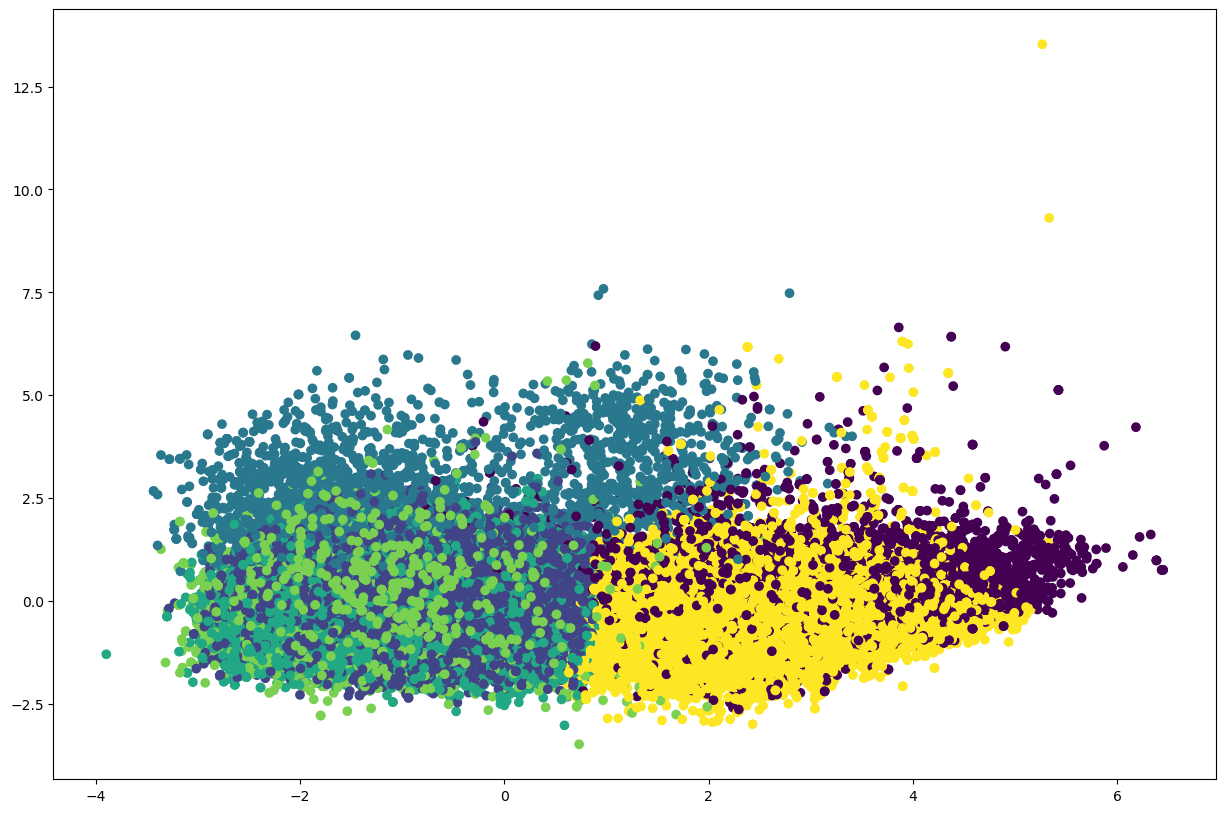

In [60]:
plt.figure(figsize=(15, 10))
plt.scatter(X_tracks_pca[:,0],X_tracks_pca[:,1], c = clusters)



In [61]:
from sklearn.manifold import TSNE

In [62]:
X_tracks_scaled[0]

KeyError: 0

In [ ]:
tsne = TSNE(n_components = 2, perplexity = 6)

In [ ]:
X_tracks_tsne = tsne.fit_transform(X_tracks_scaled)

X_tracks_tsne

NameError: name 'X_tracks_scaled' is not defined

In [ ]:
import seaborn as sns
df = pd.DataFrame()
df["y"] = clusters
df["comp-1"] = X_tracks_tsne[:,0]
df["comp-2"] = X_tracks_tsne[:,1]

# sns.scatterplot(x = X_tracks_tsne[:,0], X_tracks_tsne[:,1], data = X_tracks_tsne)

C:\Users\Domen\AppData\Local\Temp\ipykernel_17784\1604626823.py:2: UserWarning: 
The palette list has fewer values (5) than needed (6) and will cycle, which may produce an uninterpretable plot.
  sns.scatterplot(x="comp-1", y="comp-2", hue=df.y.tolist(),


[Text(0.5, 1.0, 'Iris data T-SNE projection')]

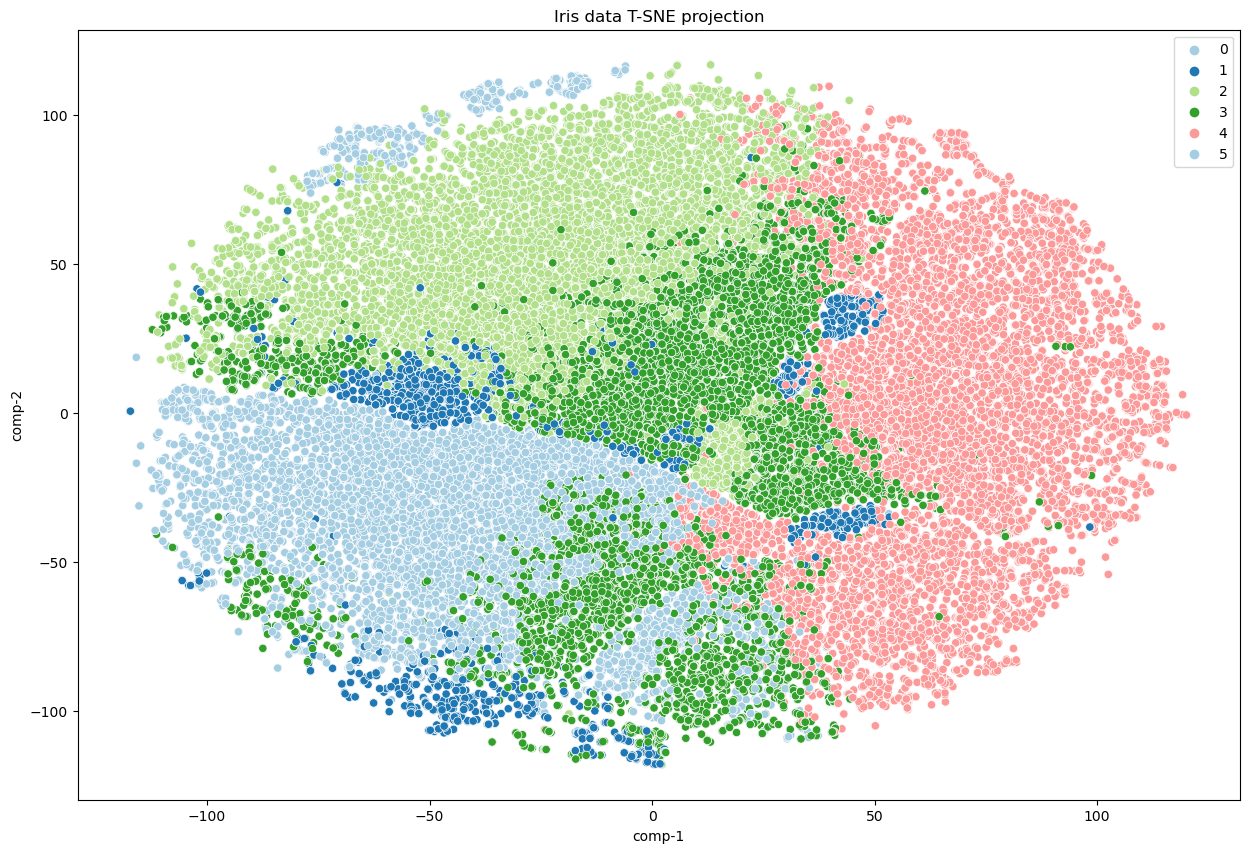

In [ ]:


plt.figure(figsize=(15 , 10))
sns.scatterplot(x="comp-1", y="comp-2", hue=df.y.tolist(),
                palette=sns.color_palette("Paired", 5),
                data=df).set(title="Iris data T-SNE projection") 

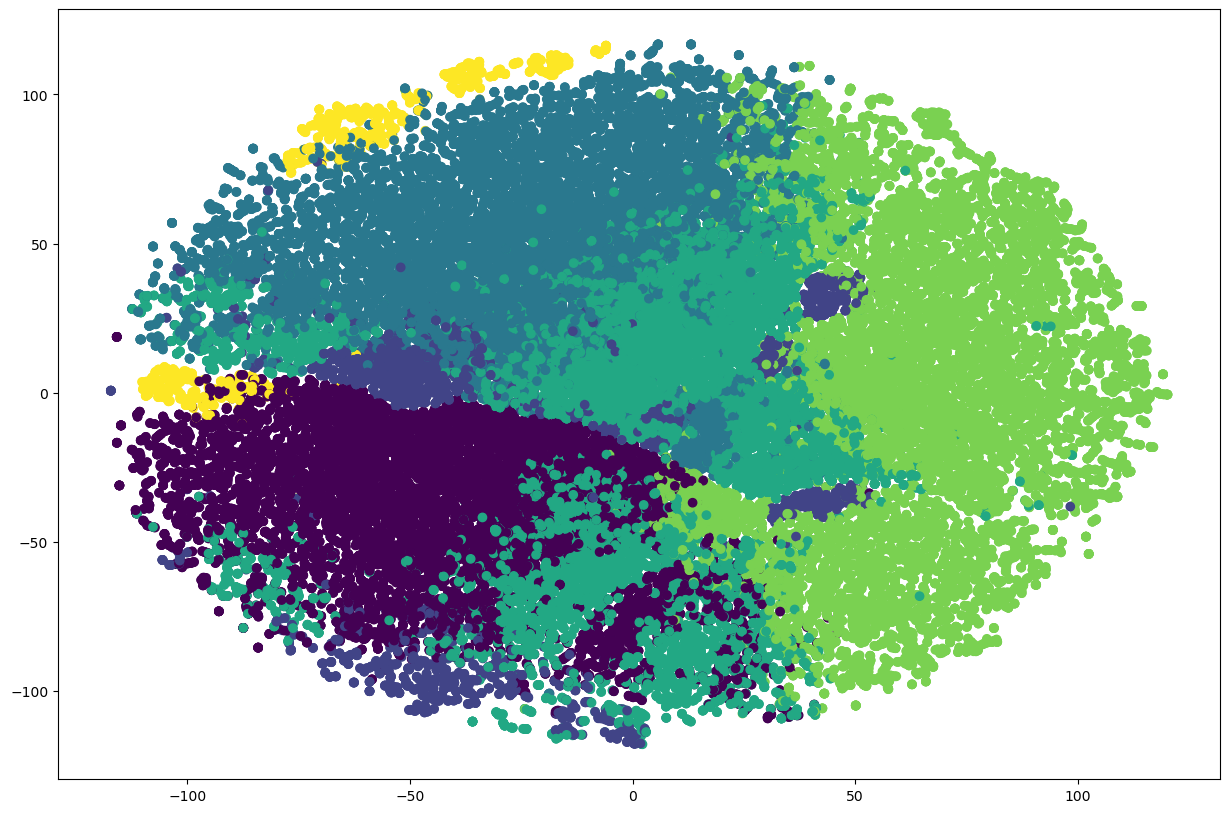

In [ ]:
plt.figure(figsize=(15, 10))
plt.scatter(X_tracks_tsne[:,0],X_tracks_tsne[:,1], c = clusters)

In [ ]:

# perplexity_values = [5, 10, 20, 30, 50]

# for perplexity in tqdm(perplexity_values):
#     # t-SNE-Modell erstellen
#     tsne = TSNE(n_components=2, perplexity=perplexity)

#     # t-SNE auf die Daten anwenden
#     X_tsne = tsne.fit_transform(X_tracks_prep)


#     plt.figure(figsize=(15 , 10))
#     plt.scatter(X_tsne[:, 0], X_tsne[:, 1], marker='o', s=30, c = clusters)
#     plt.title(f't-SNE Plot (Perplexity={perplexity})')
#     plt.xlabel('Dimension 1')
#     plt.ylabel('Dimension 2')
#     plt.show()

In [ ]:
X_tracks_prep

array([[ 2.08679174,  0.3741786 ,  1.03592027, ...,  0.68117523,
         0.89700399, -0.23248505],
       [ 1.86122901,  0.96515283,  0.45006522, ...,  0.58571714,
         1.27241569,  0.04636163],
       [ 1.29732221,  1.21219944,  0.06942493, ...,  0.4253643 ,
         1.27241569,  0.04636163],
       ...,
       [-2.70641608,  1.23157564,  0.30442893, ..., -0.21881675,
        -2.3744408 , -0.23664534],
       [-2.70641608,  1.27032805, -0.95664889, ...,  0.6595007 ,
        -2.3744408 , -0.23664534],
       [-2.70641608,  0.99421714, -0.20860798, ..., -0.70212967,
        -2.3744408 , -0.23664534]])

In [ ]:
clusters

array([0, 0, 0, ..., 3, 3, 3])